# Page Ranking

* Implement the basic PageRank algorithm using Python to display the rank of 5 pages.
* Verify the consistency of results obtained with Random walk and inbuilt PageRank function

![image.png](./image.png)

## 1. Model the Query Graph

We will create an adjacency matrix that denotes the edjes between the nodes.

In [1]:
adjacency_matrix = [
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0]
]

In [2]:
num_vertices = 5

In [3]:
# list of nodes

vertices_list = ['v1', 'v2', 'v3', 'v4', 'v5']

## 2. Use the Networkx Library to rank the pages

We will be using the `networkx` library to create a graph instance and then rank these nodes.
The Nodes in the graph are the pages and the links between them are the hyperlinks that are available between the pages, which serve as a medium through which they are connected.

<br>

[Reference Material](https://medium.com/sicara/fraud-detection-personalized-page-rank-networkx-15bd52ba2bf6)

In [4]:
# Import the Networkx Library for forming the graph
import networkx as nx

# Import the Pyplot library for plotting the created graph
from matplotlib import pyplot as plt

In [5]:
# Create an instance of the Graph class
# We are using a Directed graph due to the nature of our problem.

graph = nx.DiGraph()

In [6]:
# Load the nodes into the graph

graph.add_nodes_from(vertices_list)

In [7]:
# Add the edges from the adjacency matrix

for i in range(num_vertices) :
    for j in range(num_vertices) :
        if adjacency_matrix[i][j] == 1 :
            graph.add_edge(vertices_list[i], vertices_list[j])

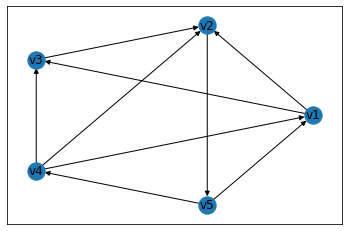

In [8]:
# Draw generated graph

nx.draw_networkx(graph, pos=nx.circular_layout(graph), arrows=True, with_labels=True)
plt.show()

In [9]:
# Compute the page ranks

page_ranks_networkx = nx.pagerank(graph, alpha=0.85)
print("The page ranks are :\n")
page_ranks_networkx

The page ranks are :



{'v1': 0.18064505060873787,
 'v2': 0.2713164308772404,
 'v3': 0.14665711544131715,
 'v4': 0.14076233474848301,
 'v5': 0.26061906832422166}

In [10]:
# Sort the pages by their ranks

page_ranks_networkx = dict(sorted(page_ranks_networkx.items(), key=lambda item: item[1], reverse=True))
page_ranks_networkx

{'v2': 0.2713164308772404,
 'v5': 0.26061906832422166,
 'v1': 0.18064505060873787,
 'v3': 0.14665711544131715,
 'v4': 0.14076233474848301}

In [11]:
# Print the pages by the order of their ranks

print("The Pages in the order of importance with the page rank scores obtained by using NetworkX are : ")
for k, v in page_ranks_networkx.items() :
    print(k, "=", v)

The Pages in the order of importance with the page rank scores obtained by using NetworkX are : 
v2 = 0.2713164308772404
v5 = 0.26061906832422166
v1 = 0.18064505060873787
v3 = 0.14665711544131715
v4 = 0.14076233474848301


## 3. Page Rank with Random Walk

We will use the Random walk of graph in order to compute the page rank of these pages.
<br>
We resort to this approach because this can serve as a validator to the above approach.
We essentially perform the operations of the library systematically so as to gain a better knowledge of the inner workings of the algorithm. 
<br>
[Reference Link](https://www.geeksforgeeks.org/page-rank-algorithm-implementation/)

In [12]:
# Calculate the number of out-bound links for each vertex

out_bound_vertices_count = [0 for _ in range(num_vertices)]

for i in range(num_vertices) :
    out_bound_vertices_count[i] = sum(adjacency_matrix[i])

out_bound_vertices_count

[2, 1, 1, 3, 2]

In [13]:
print("The Out-Bound vertices count for each vertex is as follows : ")
for i in range(num_vertices) :
    print(vertices_list[i], " : ", out_bound_vertices_count[i])

The Out-Bound vertices count for each vertex is as follows : 
v1  :  2
v2  :  1
v3  :  1
v4  :  3
v5  :  2


In [14]:
# List and store all the in-bound vertices for a particular vertex

in_bound_vertices_list = {}

for i in range(num_vertices) :
    in_bound_vertices_list[i] = []
    
    for j in range(num_vertices) :
        if adjacency_matrix[j][i] == 1 :
            in_bound_vertices_list[i].append(j)

in_bound_vertices_list

{0: [3, 4], 1: [0, 2, 3], 2: [0, 3], 3: [4], 4: [1]}

In [15]:
print("The In-bound vertices for each vertex is as follows : ")

for i in range(num_vertices) :
    print(vertices_list[i], " : ", end="")
    print(", ".join([vertices_list[j] for j in in_bound_vertices_list[i]]))

The In-bound vertices for each vertex is as follows : 
v1  : v4, v5
v2  : v1, v3, v4
v3  : v1, v4
v4  : v5
v5  : v2


The actual Page rank Algorithm

In [16]:
def pageRank(graph, vertices_names, in_bound_vertices_list, out_bound_vertices_count, tolerance=1.0e-6, max_iterations=100) :
    """
    Finds and returns the page rank for all the vertices.
    The algorithms continues for the maximum number of iterations as specfied(or 100) in case it does not converge.
    
    Parameters
    ----------
    
    graph : The adjacency matrix of the graph.
    vertices_names : The names of the vertices.
    in_bound_vertices_list : The list of all the in-bound vertices of all the vertices. A dictionary matching the vertex index with the index of all the in-bound vertices.
    out_bound_vertices_count : The list of count of all the out-bound vertices from a vertex. An array of the out-bound vertex count from a particular vertex(index positioned).
    tolerance : The accuracy of the page rank that is required.
    max_iterations : The maximum iterations that the algorithm should continue in case of no convergence.
    
    Returns
    -------
    
    page_ranks_manual : The page ranks calculated
    """
    
    # Number of vertices
    num_vertices = len(vertices_names)
    
    # Initialize the page ranks of all the vertices to be equal (1 / num_vertices)
    page_rank = [(1/num_vertices) for _ in range(num_vertices)]
    
    # Calculate the overall convergence condition for the combination of the whole list of vertices
    epsilon = num_vertices * tolerance
    
    # Start the algorithm
    converged = False
    for i in range(max_iterations) :
        
        # Store the old page ranks
        page_rank_old = page_rank[:]
        
        # Update the page ranks of all the vertices
        for j in range(num_vertices) :
            
            # Because of addition further ahead, we re-initialize this value
            page_rank[j] = 0
            
            # Add all the in-bound vertices page rank/out-bound count
            for k in in_bound_vertices_list[j] :
                page_rank[j] += page_rank_old[k] / out_bound_vertices_count[k]
            
        # Check for convergence condition
        error = sum([abs(page_rank[j] - page_rank_old[j]) for j in range(num_vertices)])
        if error < epsilon :
            converged = True
            break
    
    # Return the solution, only if convergence has taken place
    if converged :
        page_rank_manual = {}
        
        for i, pr in enumerate(page_rank) :
            page_rank_manual[vertices_names[i]] = pr
        
        return page_rank_manual

In [17]:
page_rank_manual = pageRank(graph, vertices_list, in_bound_vertices_list, out_bound_vertices_count)
page_rank_manual

{'v1': 0.1818174601173467,
 'v2': 0.2727282232687022,
 'v3': 0.1363637933458539,
 'v4': 0.13636291920730784,
 'v5': 0.27272760406078966}

In [18]:
# Sort the pages by their ranks

page_rank_manual = dict(sorted(page_rank_manual.items(), key=lambda item: item[1], reverse=True))
page_rank_manual

{'v2': 0.2727282232687022,
 'v5': 0.27272760406078966,
 'v1': 0.1818174601173467,
 'v3': 0.1363637933458539,
 'v4': 0.13636291920730784}

In [19]:
# Print the pages by the order of their ranks

print("The Pages in the order of importance with the page rank scores obtained by performing Random Walk are : ")
for k, v in page_rank_manual.items() :
    print(k, "=", v)

The Pages in the order of importance with the page rank scores obtained by performing Random Walk are : 
v2 = 0.2727282232687022
v5 = 0.27272760406078966
v1 = 0.1818174601173467
v3 = 0.1363637933458539
v4 = 0.13636291920730784


## Result

We can by this conclude that the page ranks obtained by both the algorithms are nearly the same.
<br>
And further we see that the order of the pages delivered by both the algorithms is the same.
<br>
The order of the nodes by their page ranks is : `v2 > v5 > v1 > v3 > v4`